# Project 8: Monto carlo simulation
  Aim: Simulate the behavior of customers in a restaurant

### Import necessary libraries and read data

In [1]:


import  pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('seaborn')


cus_f = pd.read_csv('friday.csv', sep=';')
cus_m = pd.read_csv('monday.csv', sep=';')
cus_th = pd.read_csv('thursday.csv', sep=';')
cus_tu = pd.read_csv('tuesday.csv', sep=';')
cus_w = pd.read_csv('wednesday.csv', sep=';')




### We assume that the customers are random, based on this assupmtion, relabel the column 'customer_no'

In [2]:
cus_m['customer_no'] = cus_m['customer_no'] + 100000
cus_tu['customer_no'] = cus_tu['customer_no'] + 20000
cus_w['customer_no'] = cus_w['customer_no'] + 300000
cus_th['customer_no'] = cus_th['customer_no'] + 40000
cus_f['customer_no'] = cus_f['customer_no'] + 500000

### Merge files and see the general structure

In [3]:
d1 = cus_f.merge(cus_tu, how='outer')
d2 = d1.merge(cus_w, how='outer')
d3 = d2.merge(cus_th, how='outer')
week = d3.merge(cus_m, how='outer')
week

,timestamp,customer_no,location
0,2019-09-06 07:00:00,500001,dairy
1,2019-09-06 07:00:00,500002,drinks
2,2019-09-06 07:00:00,500003,fruit
3,2019-09-06 07:01:00,500002,checkout
4,2019-09-06 07:01:00,500004,drinks
...,...,...,...
24872,2019-09-02 21:49:00,101442,checkout
24873,2019-09-02 21:49:00,101444,checkout
24874,2019-09-02 21:49:00,101445,dairy
24875,2019-09-02 21:50:00,101446,dairy


In [4]:
# Convert the 'timestamp' columns to datetime

week['timestamp'] = pd.to_datetime(week['timestamp'])


## Print the numner of visitors for the whole week

In [5]:
sections = week.groupby('location')['customer_no'].count()
sections = pd.DataFrame(sections)
sections.reset_index(inplace=True)
sections

,location,customer_no
0,checkout,7417
1,dairy,4679
2,drinks,3905
3,fruit,5122
4,spices,3754


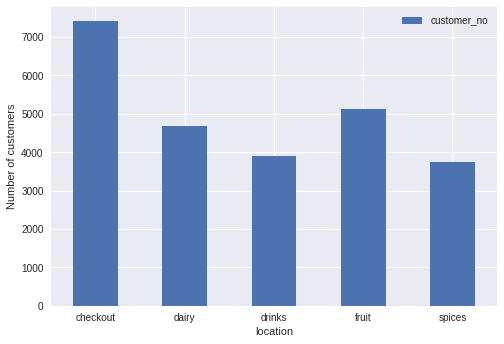

In [6]:
ax = sections.plot.bar(x='location', y='customer_no', rot=0, ylabel='Number of customers')

## Extract  data for each section to do simulation for number of visitors over time

In [7]:
data_dairy = week.loc[week['location'] == 'dairy']
data_drinks = week.loc[week['location'] == 'drinks']
data_fruit = week.loc[week['location'] == 'fruit']
data_spices = week.loc[week['location'] == 'spices']
data_checkout = week.loc[week['location'] == 'checkout']

# check for the checkout section
data_checkout

,timestamp,customer_no,location
3,2019-09-06 07:01:00,500002,checkout
6,2019-09-06 07:02:00,500004,checkout
14,2019-09-06 07:04:00,500008,checkout
15,2019-09-06 07:05:00,500001,checkout
17,2019-09-06 07:05:00,500007,checkout
...,...,...,...
24857,2019-09-02 21:47:00,101438,checkout
24862,2019-09-02 21:48:00,101431,checkout
24864,2019-09-02 21:48:00,101434,checkout
24872,2019-09-02 21:49:00,101442,checkout


### Group by timetamp and location with frequency one hour   

In [8]:

#  dairy section 

data_hour_dairy = data_dairy.groupby(pd.Grouper(key='timestamp', axis=0, 
                      freq='H'))['location'].count()
data_hour_dairy = pd.DataFrame(data_hour_dairy)



#   drinks section 
data_hour_drinks = data_drinks.groupby(pd.Grouper(key='timestamp', axis=0, 
                      freq='H'))['location'].count()
data_hour_drinks = pd.DataFrame(data_hour_drinks)



#  fruit section 
data_hour_fruit = data_fruit.groupby(pd.Grouper(key='timestamp', axis=0, 
                      freq='H'))['location'].count()
data_hour_fruit = pd.DataFrame(data_hour_fruit)


#  spices section 
data_hour_spices = data_spices.groupby(pd.Grouper(key='timestamp', axis=0, 
                      freq='H'))['location'].count()
data_hour_spices = pd.DataFrame(data_hour_spices)



#  checkout section 
data_hour_checkout = data_checkout.groupby(pd.Grouper(key='timestamp', axis=0, 
                      freq='H'))['location'].count()

data_hour_checkout = pd.DataFrame(data_hour_checkout)




### Simulations of number of visitors for each section over every hour 

In [9]:

#plot_dairy = data_hour_dairy.plot.bar( y='location', rot=0, xlabel='Hour', ylabel='Number of visitors', title='Dairy section')


#plot_drinks = data_hour_drinks.plot.bar( y='location', rot=0, xlabel='Hour', ylabel='Number of visitors', title='Drinks section')

#plot_fruit = data_hour_fruit.plot.bar( y='location', rot=0, xlabel='Hour', ylabel='Number of visitors', title='Fruit section')

#plot_spices = data_hour_spices.plot.bar( y='location', rot=0, xlabel='Hour', ylabel='Number of visitors', title='Spices section')

#plot_checkout = data_hour_checkout.plot.bar( y='location', rot=0, xlabel='Hour', ylabel='Number of visitors', title='Checkout section')

## Sort dataframe with respect to customer_no and timestamp

In [10]:
week.sort_values(by=['customer_no', 'timestamp'], inplace= True)

week.head(6)

,timestamp,customer_no,location
5125,2019-09-03 07:02:00,20001,fruit
5128,2019-09-03 07:05:00,20001,drinks
5150,2019-09-03 07:12:00,20001,checkout
5126,2019-09-03 07:02:00,20002,drinks
5159,2019-09-03 07:14:00,20002,fruit
5186,2019-09-03 07:17:00,20002,checkout


### Choose unique customers

In [11]:
customers_unique = week['customer_no'].unique()
customers_unique = list(customers_unique)


### Force every cutomer to go to checkout

In [12]:


for i in customers_unique:
    
   
    customer_data = week.loc[week['customer_no'] == i]
    if len(customer_data['location']) ==1:
        print('-----------')
        print(customer_data)
    if customer_data.loc[customer_data['location'] == 'checkout'].empty:
        time = str(list(customer_data['timestamp'])[0])
       
        dict = {'timestamp':time[0:11] + '22:00:00' , 'customer_no': i, 'location': 'checkout'}
        week = week.append(dict, ignore_index = True)

   

/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pan

-----------
                timestamp  customer_no location
9812  2019-09-05 21:48:00        41532    dairy
-----------
                timestamp  customer_no location
9813  2019-09-05 21:48:00        41533    dairy


/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pan

-----------
                 timestamp  customer_no location
14687  2019-09-02 21:46:00       101439    fruit
-----------
                 timestamp  customer_no location
14699  2019-09-02 21:49:00       101445    dairy
-----------
                 timestamp  customer_no location
14700  2019-09-02 21:50:00       101446    dairy
-----------
                 timestamp  customer_no location
14701  2019-09-02 21:50:00       101447    fruit


/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pan

-----------
                 timestamp  customer_no location
24870  2019-09-06 21:48:00       501506    dairy
-----------
                 timestamp  customer_no location
24875  2019-09-06 21:50:00       501509   drinks
-----------
                 timestamp  customer_no location
24876  2019-09-06 21:50:00       501510   spices


/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  week = week.append(dict, ignore_index = True)
/tmp/ipykernel_60587/3185268551.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pan

### Set datime again and sort by customer_no and timestamp

In [13]:
week['timestamp'] = pd.to_datetime(week['timestamp'])

week.sort_values(by=['customer_no', 'timestamp'], inplace= True)


## Get the location vector and next_location vector seperately

In [14]:
# Into the location and next_location vectors, entrance and chekout will be added

location = []
next_location = []


for i in customers_unique:
    
    
    df1 = ['drinks', 'fruit', 'spices', 'dairy', 'checkout', 'entrance'] 
    df2 = [[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0],[0,0,0,0,1,0],[0,0,0,0,0,0]]

    data_group = pd.DataFrame(df2, index=[df1], columns=df1)
    
   
    customer_data = week.loc[week['customer_no'] == i]
    
    
    
    first_time =  list(customer_data['timestamp'])[0]
    end_time = list(customer_data['timestamp'])[-1]
    
    datelist = pd.date_range(start=first_time, end=end_time, freq='60S')
    datelist = pd.DataFrame(datelist)

    
    
    
    datelist['timestamp'] = datelist[0]
    datelist.drop(columns=0, inplace=True)
   

    d1 = datelist.merge(customer_data, how='outer')
    d1.ffill(inplace=True)
    d1 = d1.astype({"customer_no": int}, errors='raise') 
    
    d1['next_location'] = d1['location'].shift(-1)
    
  
    
    d1_s = []
    d1_s = list(d1['location'])
    d1_s.insert(0,'entrance')
    d1_f = pd.DataFrame(d1_s, columns=['location'])
    d1_f['next_location'] = d1_f['location'].shift(-1)
    d1_f.fillna('checkout', inplace=True)
    #print(d1_f)    
    
    location.extend(list(d1_f['location']))
    next_location.extend(list(d1_f['next_location']))
    
    
  


### Concatenate location and next_location

In [15]:
data_shift = pd.DataFrame(list(zip(location, next_location)), columns=['location', 'next_location'])
data_shift.head(19)

,location,next_location
0,entrance,fruit
1,fruit,fruit
2,fruit,fruit
3,fruit,drinks
4,drinks,drinks
5,drinks,drinks
6,drinks,drinks
7,drinks,drinks
8,drinks,drinks
9,drinks,drinks


## Obtain the transition matrix

In [16]:
transition_df = data_shift.groupby('location')['next_location'].value_counts(normalize=True).unstack()


transition_df.fillna(0, inplace=True)

entrance = [0.0,0.0,0.0,0.0,0.0,0.0]

transition_df['entrance'] = entrance

transition_df = transition_df.reindex(['checkout','dairy','drinks','fruit','spices','entrance'])

print(transition_df)

transition_df.sum(axis = 1)

next_location  checkout     dairy    drinks     fruit    spices  entrance
location                                                                 
checkout       1.000000  0.000000  0.000000  0.000000  0.000000       0.0
dairy          0.102617  0.738910  0.058088  0.049439  0.050946       0.0
drinks         0.215290  0.010877  0.599282  0.087737  0.086814       0.0
fruit          0.200454  0.095376  0.054534  0.599249  0.050387       0.0
spices         0.149494  0.191688  0.161820  0.090234  0.406764       0.0
entrance       0.000000  0.287576  0.153526  0.377435  0.181464       0.0


location
checkout    1.0
dairy       1.0
drinks      1.0
fruit       1.0
spices      1.0
entrance    1.0
dtype: float64

## Convert the transition matrix into list

In [17]:
transition_matrix=[]

temp_matrix = list(transition_df.to_numpy())

for i in temp_matrix:
    transition_matrix.append(list(i))




## Create a function that gives state vectors

In [18]:
def statevector(section):
    if section=='checkout':
       vec = [1,0,0,0,0,0]
    if section=='dairy':
       vec = [0,1,0,0,0,0]
    if section=='drinks':
       vec = [0,0,1,0,0,0] 
    if section=='fruit':
       vec = [0,0,0,1,0,0]   
    if section=='spices':
       vec = [0,0,0,0,1,0]
    if section=='entrance':
       vec = [0,0,0,0,0,1]         
    return vec

## Create a function that gives the location according to the probabilitiy distribustion

In [19]:
import math as mt
import random

def state_name(vec):
    
    p1 = ['checkout']*(mt.ceil(vec[0]))*100
    p2 = ['dairy']*(mt.ceil(vec[1]))*100
    p3 = ['drinks']*(mt.ceil(vec[2]))*100
    p4 = ['fruit']*(mt.ceil(vec[3]))*100
    p5 = ['spices']*(mt.ceil(vec[4]))*100
    p6 = ['enrtance']*(mt.ceil(vec[5]))*100
    
    vec_c = p1 + p2 + p3 + p4 + p5 + p6
    
    random.shuffle(vec_c)
    
    next_state = random.choice(vec_c)
    
    
    
    #print(next_state)
    
    return next_state
    

## Get  names from data

In [20]:
name_data = pd.read_csv('namelist.csv')
name_w = list(name_data['name'])

# choose the first 500 names

name = name_w[0:499]


## Create time series with frequency 1 minute

In [21]:
from datetime import datetime


t1 = datetime.strptime('09/10/19 07:00:00', '%m/%d/%y %H:%M:%S')
t2 = datetime.strptime('09/10/19 22:00:00', '%m/%d/%y %H:%M:%S')


time_series= pd.DataFrame(pd.date_range(start=t1, end=t2, freq='60S'))


#### Create a function that retrives the time according to the index of 'time_series'

In [22]:
def choose_time(l):
    time = time_series[0][l]
    #print(time)
    return time

##  Create Customer class

In [23]:
import numpy as np


class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    Customer.path is a list consist of the section names the customer follows
    Customer.visit_time is a list that stores of visit times of each secton
    """   
    
    def __init__(self, name, path=[5], entry_time=0, visit_times=[0], budget=100):
        self.name = name
        self.budget = budget
        
        
        
        # Make the whole path of the customer
        
        position = 'entrance'
        
        path_v = ['entrance']
        
        while position != 'checkout':
              vec = statevector(position)
              
              next_state_vec = np.dot(vec, transition_matrix)
              next_position = state_name(next_state_vec) 
              path_v.append(next_position) 
              position = next_position
        self.path = path_v
        
        # assign a randam enty_time
        l = len(time_series)   
        
        l_p = len(self.path) # this is not to exceed close time
        
            # choose a random int in (0,l)
        l_1 = random.randint(0, l-l_p-1)
        self.entry_time = choose_time(l_1)
        
        
        ll = len(self.path)
        self.visit_times = pd.date_range(start=self.entry_time, periods=ll, freq='60S')
        

## Create 500 customers

In [24]:
my_objects = {}
for i in name:
    name1 = format(i)
   
    my_objects[name1] = my_objects.get(name1, Customer(name = name1))

## Write the timestamps, locations and customer name in a file

In [25]:
df_w = pd.DataFrame(columns=['timestamp', 'customer_name', 'location'])


for i in name:
    df = pd.DataFrame()
    name1 = format(i)
    t1 = pd.DataFrame(my_objects[name1].visit_times)
    p1 = pd.DataFrame(my_objects[name1].path)
    
    l = len(t1[0])
    
    n1 = pd.DataFrame([name1]*l)
    
    #t1_w.append(t1)
    #p1_w.append(p1)
    #n1_w.append(n1)
    df['timestamp'] = t1[0]
    df['customer_name'] = n1[0]
    df['location'] = t1[0]
    d1 = df_w.merge(df, how='outer')
    df_w = d1
df_w.to_csv('customer_info.csv')   

# Do the simulation in a supermarket 

In [26]:
#!pip3 install opencv-python

import numpy as np
import cv2
from datetime import datetime
import time
import random
import playsound

TILE_SIZE = 32




def get_market(c1fr, c1dr,c1sp, c1da,c2fr, c2dr,c2sp, c2da,c3fr, c3dr,c3sp, c3da,c4fr, c4dr,c4sp, c4da , c1ch,c2ch,c3ch,c4ch,c1en,c2en,c3en,c4en):
    MARKET = ("""
##################
##..............##
#W..WZ..ZS..UT..T#
#W{}.WZ{}.ZS{}.ST.{}T#
#F.{}FD.{}DS.{}ST{}.T#
#F{}.FD{}.DU{}.UA.{}A#
#F.{}FD.{}DU.{}UA{}.A#
##...............#
##{}{}C#.{}C#.{}C#...#
##..##..##..##...#
##...........{}{}{}{}#
#############GGGG#
    """.format(c1fr, c1dr,c1sp, c1da,c2fr, c2dr,c2sp, c2da,c3fr, c3dr,c3sp, c3da,c4fr, c4dr,c4sp, c4da, c1ch,c2ch,c3ch,c4ch,c1en,c2en,c3en,c4en)).strip()
    return MARKET
   


class SupermarketMap:
    """Visualizes the supermarket background"""

    def __init__(self, layout, tiles):
        """
        layout : a string with each character representing a tile
        tiles   : a numpy array containing all the tile images
        """
        self.tiles = tiles
        # split the layout string into a two dimensional matrix
        self.contents = [list(row) for row in layout.split("\n")]
        self.ncols = len(self.contents[0])
        self.nrows = len(self.contents)
        self.image = np.zeros(
            (self.nrows*TILE_SIZE, self.ncols*TILE_SIZE, 3), dtype=np.uint8
        )
        self.prepare_map()

    def extract_tile(self, row, col):
        """extract a tile array from the tiles image"""
        y = row*TILE_SIZE
        x = col*TILE_SIZE
        return self.tiles[y:y+TILE_SIZE, x:x+TILE_SIZE]

    def get_tile(self, char):
        """returns the array for a given tile character"""
        if char == "#":
            return self.extract_tile(0, 0)
        elif char == "G":
            return self.extract_tile(7, 3)
        elif char == "C":
            return self.extract_tile(2, 8)
        elif char == "F":
            return self.extract_tile(0, 4)
        elif char == "D":
            return self.extract_tile(6, 13)
        elif char == "S":
            return self.extract_tile(6, 9)
        elif char == "T":
            return self.extract_tile(7, 11)
        elif char == "K":
            return self.extract_tile(3, 0)
        elif char == "L":
            return self.extract_tile(3, 0)    
        elif char == "M":
            return self.extract_tile(3, 1)    
        elif char == "N":
            return self.extract_tile(5, 0)   
        elif char == "O":
            return self.extract_tile(6, 1)  
        elif char == "P":
            return self.extract_tile(3, 0)  
        elif char == "W":
            return self.extract_tile(3, 4)   
        elif char == "Z":
            return self.extract_tile(3, 13)  
        elif char == "U":
            return self.extract_tile(5, 9)
        elif char == "A":
            return self.extract_tile(1, 14)         
        else:
            return self.extract_tile(1, 2)

    def prepare_map(self):
        """prepares the entire image as a big numpy array"""
        for row, line in enumerate(self.contents):
            for col, char in enumerate(line):
                bm = self.get_tile(char)
                y = row*TILE_SIZE
                x = col*TILE_SIZE
                self.image[y:y+TILE_SIZE, x:x+TILE_SIZE] = bm

    def draw(self, frame):
        """
        draws the image into a frame
        """
        frame[0:self.image.shape[0], 0:self.image.shape[1]] = self.image

    def write_image(self, filename):
        """writes the image into a file"""
        cv2.imwrite(filename, self.image)


 

if __name__ == "__main__":

    background = np.zeros((500, 700, 3), np.uint8)
    tiles = cv2.imread("tiles.png")

    c1fr = '.'
    c1dr = '.'
    c1sp = '.'
    c1da = '.'
    c2fr = '.'
    c2dr = '.'
    c2sp = '.'
    c2da = '.'
    c3fr = '.'
    c3dr = '.'
    c3sp = '.'
    c3da = '.'
    c4fr = '.'
    c4dr = '.'
    c4sp = '.'
    c4da = '.'
    c1ch = '.'
    c2ch= '.'
    c3ch= '.'
    c4ch= '.'
    c1en = '.'
    c2en= '.'
    c3en= '.'
    c4en= '.'
    
    
    name1 = random.choice(name)
    name2 = random.choice(name)
    name3 = random.choice(name)
    name4 = random.choice(name)
        
        
    cus1_path = my_objects[name1].path
    cus2_path = my_objects[name2].path
    cus3_path = my_objects[name3].path
    cus4_path = my_objects[name4].path
    
    l1 = len(cus1_path)
    l2 = len(cus2_path)
    l3 = len(cus3_path)
    l4 = len(cus4_path)
    
    k1 = 0
    k2 = 0
    k3 = 0
    k4 = 0
    
    while True:
        
        # customer 1
        if k1 < l1:
            c1_p = cus1_path[k1]
            k1 = k1 + 1
            #print(k1,l1)
        if k1 == l1:    
            name1 = random.choice(name)
            cus1_path = my_objects[name1].path
            l1 = len(cus1_path)
            #print('---------')
            k1 = 0
            
        if c1_p == 'fruit':
           c1fr = 'L'
           c1dr = '.'
           c1sp = '.'
           c1da = '.'
           c1ch = '.'  
           c1en = '.'
        if c1_p == 'drinks':
           c1fr = '.'
           c1dr = 'L'
           c1sp = '.'
           c1da = '.'
           c1ch = '.'
           c1en = '.'
        if c1_p == 'spices':
           c1fr = '.'
           c1dr = '.'
           c1sp = 'L'
           c1da = '.'
           c1ch = '.'
           c1en = '.'
        if c1_p == 'dairy':
           c1fr = '.'
           c1dr = '.'
           c1sp = '.'
           c1da = 'L'  
           c1ch = '.'
           c1en = '.'
        if c1_p == 'checkout':
           c1fr = '.'
           c1dr = '.'
           c1sp = '.'
           c1da = '.'             
           c1ch = 'L' 
           c1en = '.'
           
        if c1_p == 'entrance':
           c1fr = '.'
           c1dr = '.'
           c1sp = '.'
           c1da = '.'             
           c1ch = '.' 
           c1en = 'L'            

        # customer 2
        if k2 < l2:
            c2_p = cus2_path[k2]
            k2 = k2 + 1
        elif k2 == l2:    
            name2 = random.choice(name)
            cus2_path = my_objects[name2].path
            l2 = len(cus2_path)
            k2 = 0      
            
        if c2_p == 'fruit':
           c2fr = 'M'
           c2dr = '.'
           c2sp = '.'
           c2da = '.'
           c2ch = '.' 
           c2en = '.'
        if c2_p == 'drinks':
           c2fr = '.'
           c2dr = 'M'
           c2sp = '.'
           c2da = '.'
           c2ch = '.'
           c2en = '.'
        if c2_p == 'spices':
           c2fr = '.'
           c2dr = '.'
           c2sp = 'M'
           c2da = '.'
           c2ch = '.'
           c2en = '.'
        if c2_p == 'dairy':
           c2fr = '.'
           c2dr = '.'
           c2sp = '.'
           c2da = 'M'
           c2ch = '.'
           c2en = '.'
        if c2_p == 'checkout':
           c2fr = '.'
           c2dr = '.'
           c2sp = '.'
           c2da = '.'             
           c2ch = 'M'
           c2en = '.'
           
        if c2_p == 'entrance':
           c2fr = '.'
           c2dr = '.'
           c2sp = '.'
           c2da = '.'             
           c2ch = '.'
           c2en = 'M'            
            
            
            
        # customer 3
        if k3 < l3:
            c3_p = cus3_path[k3]
            k3 = k3 + 1
        elif k3 == l3:    
            name3 = random.choice(name)
            cus3_path = my_objects[name3].path
            l3 = len(cus3_path)
            k3 = 0    
            
            
        if c3_p == 'fruit':
           c3fr = 'N'
           c3dr = '.'
           c3sp = '.'
           c3da = '.'
           c3ch = '.' 
           c3en = '.'
        if c3_p == 'drinks':
           c3fr = '.'
           c3dr = 'N'
           c3sp = '.'
           c3da = '.'
           c3ch = '.'
           c3en = '.'
        if c3_p == 'spices':
           c3fr = '.'
           c3dr = '.'
           c3sp = 'N'
           c3da = '.'
           c3ch = '.'
           c3en = '.'
        if c3_p == 'dairy':
           c3fr = '.'
           c3dr = '.'
           c3sp = '.'
           c3da = 'N'
           c3ch = '.'
           c3en = '.'
        if c3_p == 'checkout':
           c3fr = '.'
           c3dr = '.'
           c3sp = '.'
           c3da = '.'
           c3ch = 'N'
           c3en = '.'
           
        if c3_p == 'entrance':
           c3fr = '.'
           c3dr = '.'
           c3sp = '.'
           c3da = '.'
           c3ch = '.'
           c3en = 'N'        
            
            
        # customer 4
        if k4 < l4:
            c4_p = cus4_path[k4]
            k4 = k4 + 1
            
        elif k4 == l4:    
            name4 = random.choice(name)
            cus4_path = my_objects[name4].path
            l4 = len(cus4_path)
            k4 = 0      
            
        if c4_p == 'fruit':
           c4fr = 'O'
           c4dr = '.'
           c4sp = '.'
           c4da = '.'
           c4ch = '.' 
           c4en = '.'
        if c4_p == 'drinks':
           c4fr = '.'
           c4dr = 'O'
           c4sp = '.'
           c4da = '.'
           c4ch = '.' 
           c4en = '.'
        if c4_p == 'spices':
           c4fr = '.'
           c4dr = '.'
           c4sp = 'O'
           c4da = '.'
           c4ch = '.' 
           c4en = '.'
        if c4_p == 'dairy':
           c4fr = '.'
           c4dr = '.'
           c4sp = '.'
           c4da = 'O'
           c4ch = '.' 
           c4en = '.'
        if c4_p == 'checkout':
           c4fr = '.'
           c4dr = '.'
           c4sp = '.'
           c4da = '.'
           c4ch = 'O' 
           c4en = '.'
           
        if c4_p == 'entrance':
           c4fr = '.'
           c4dr = '.'
           c4sp = '.'
           c4da = '.'
           c4ch = '.' 
           c4en = 'O'            
            
            
            
            

    
        MARKET1 = get_market(c1fr, c1dr,c1sp, c1da,c2fr, c2dr,c2sp, c2da,c3fr, c3dr,c3sp, c3da,c4fr, c4dr,c4sp, c4da,c1ch,c2ch,c3ch,c4ch,c1en,c2en,c3en,c4en)
    
        market = SupermarketMap(MARKET1, tiles)
    
 
    
    
        frame = background.copy()
        market.draw(frame)
        
        cv2.imshow("Customer behavior", frame)
        
        
 
        time.sleep(1)
    
    
    
        if c1_p == 'checkout':
            playsound.playsound('odeme.mp3', False)
        if c2_p == 'checkout':  
            playsound.playsound('odeme.mp3', False)
        if c3_p == 'checkout':  
            playsound.playsound('odeme.mp3', False)
        if c4_p == 'checkout':  
            playsound.playsound('odeme.mp3', False)  
        
        
      
        # https://www.ascii-code.com/
        key = cv2.waitKey(1)
       
        if key == 113: # 'q' key
            break
        
        
        
        
        #cv2.imshow("frame", frame)

        time.sleep(1)
        
        #now = datetime.now()

        #current_time = now.strftime("%H:%M:%S")
        #print("Current Time =", current_time)
        

    cv2.destroyAllWindows()

    market.write_image("supermarket.png")


        

        
        



playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.
QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to target thread (0x5586173ee440)

QObject::moveToThread: Current thread (0x5586173ee440) is not the object's thread (0x558617d103e0).
Cannot move to tar